##### Problem:- Predict the response of the customers based on the given feature 
##### Problem Type:- CLASSIFICATION PROBLEM

#### Data Consists of
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import median
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegressionCV

%matplotlib inline

In [2]:
# Loading the data

df = pd.read_csv("bank-marketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# changing the name of the columns as per their meaning

df.columns = ['age', 'job', 'salary', 'marital', 'education', 'targeted', 'has_credit',
       'balance', 'house_loan', 'personal_loan', 'contact_type', 'day_of_month_contacted', 'month_contacted', 'last_contacted_duration',
       'current_campaign_contacted_times', 'last_contacted_pdays', 'previous_campaign_contacted_times', 'previous_outcome_poutcome', 'response']

In [4]:
# Getting basic details of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   age                                45211 non-null  int64 
 1   job                                45211 non-null  object
 2   salary                             45211 non-null  int64 
 3   marital                            45211 non-null  object
 4   education                          45211 non-null  object
 5   targeted                           45211 non-null  object
 6   has_credit                         45211 non-null  object
 7   balance                            45211 non-null  int64 
 8   house_loan                         45211 non-null  object
 9   personal_loan                      45211 non-null  object
 10  contact_type                       45211 non-null  object
 11  day_of_month_contacted             45211 non-null  int64 
 12  mont

Conclusion: Here there is no NAN values in the dataset and the datatypes are also fine

In [5]:
# Looking to the basic information of the dataset

df.describe()

,age,salary,balance,day_of_month_contacted,last_contacted_duration,current_campaign_contacted_times,last_contacted_pdays,previous_campaign_contacted_times
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Converting the response to the numerical values

df["response"] = np.where(df["response"] == "no",0,1)

In [7]:
# Seperating the dependent and independent features

X = df.drop("response",axis = 1)
y = df["response"]

In [8]:
# Here we can say that the dataset is imbalance

y.value_counts()

0    39922
1     5289
Name: response, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


11.698480458295547


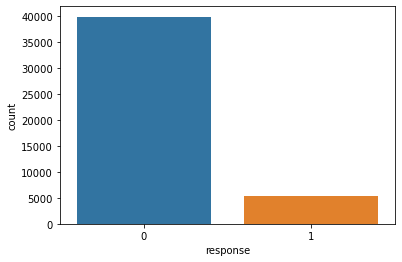

In [9]:
sns.countplot(y)
print((y.value_counts()[1] / y.shape[0]) * 100)
plt.show()

Conclusion: Class 0 is present nearly 88% and Class 1 is present nearly 11% Thus it is a Imbalance Dataset

In [10]:
# Seperating the numerical and the Categorical columns

num_cols = [col for col in X.columns if X[col].dtypes != "object"]
cat_cols = [col for col in X.columns if col not in num_cols]

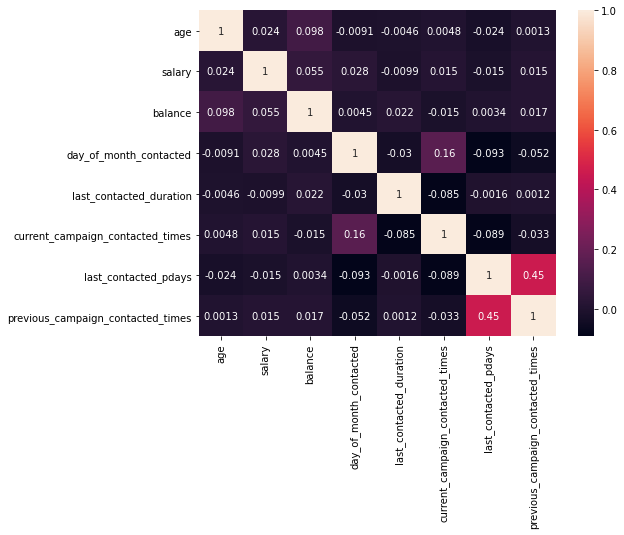

In [11]:
# Looking to the co-relation of the dataset

cormat = X.corr()
plt.figure(figsize = (8,6))
sns.heatmap(cormat , annot = True)
plt.show()

Conclusion: Here columns are not co-related

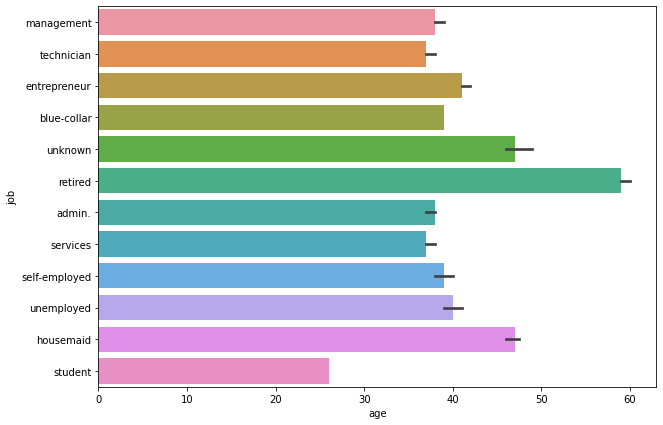

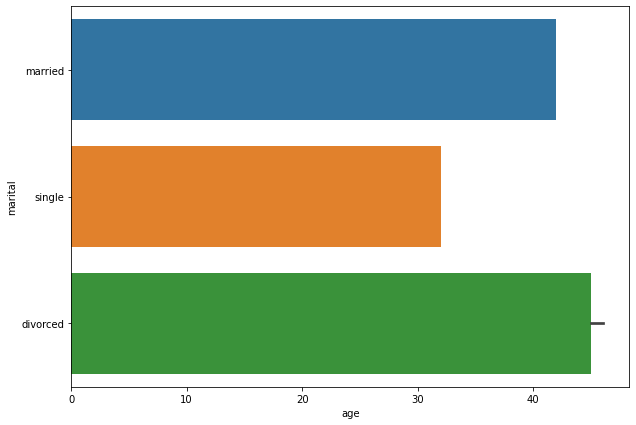

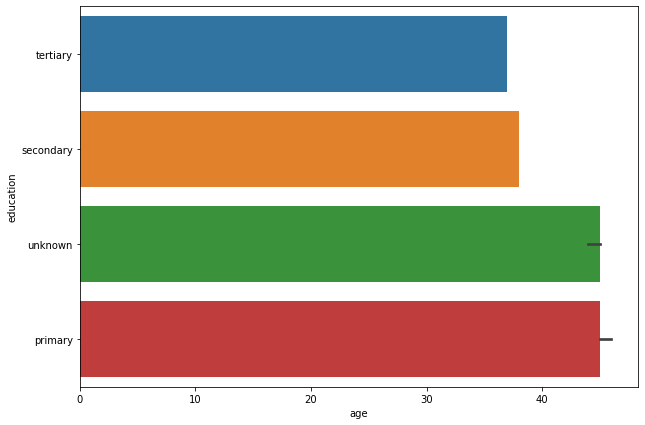

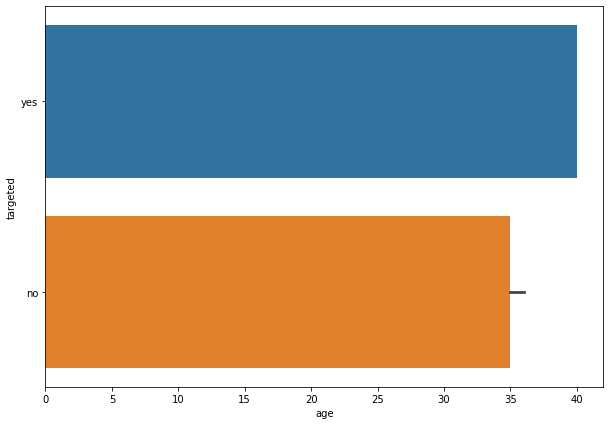

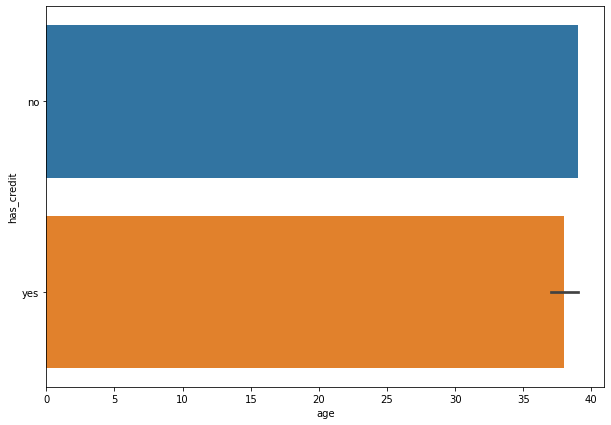

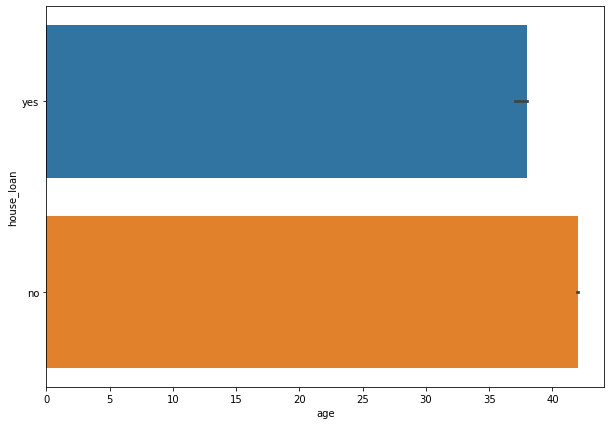

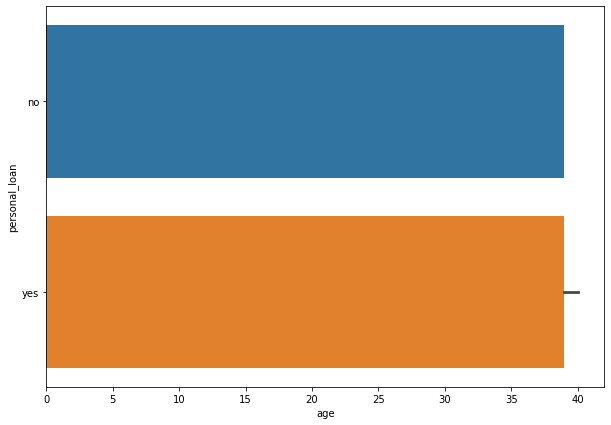

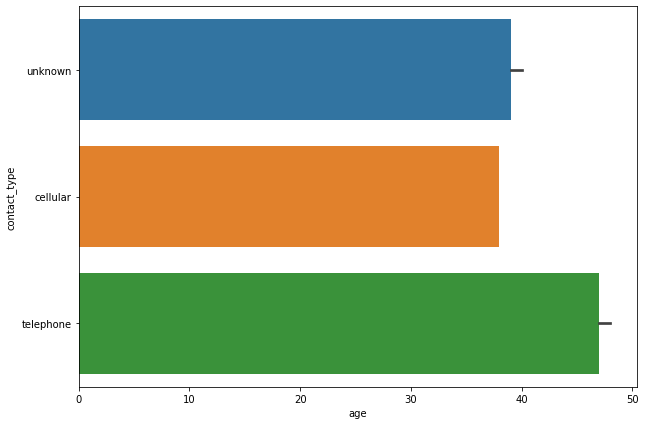

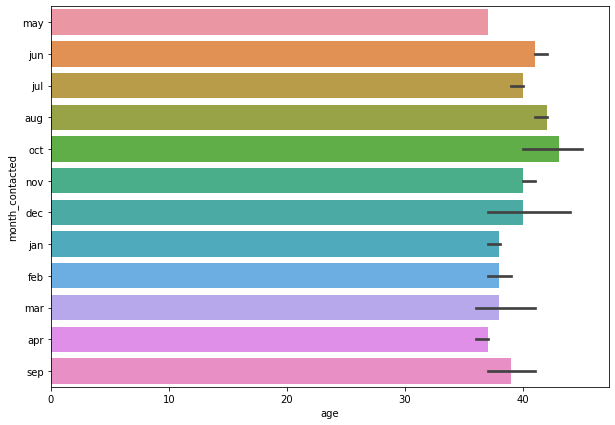

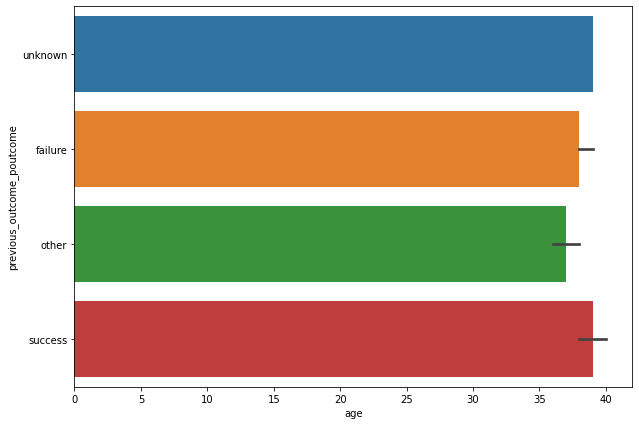

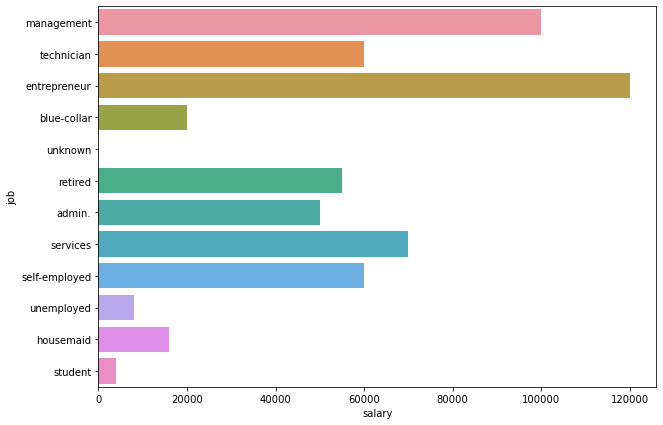

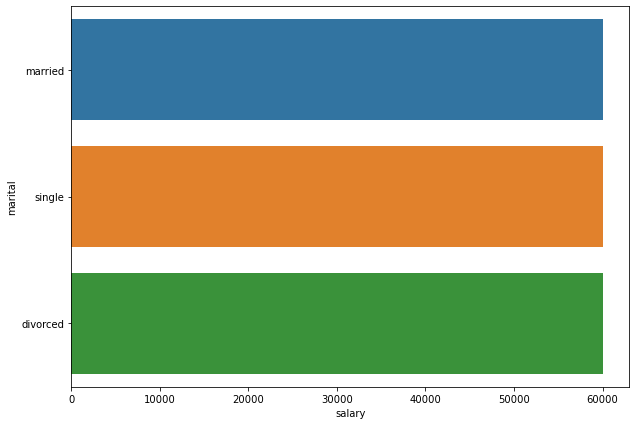

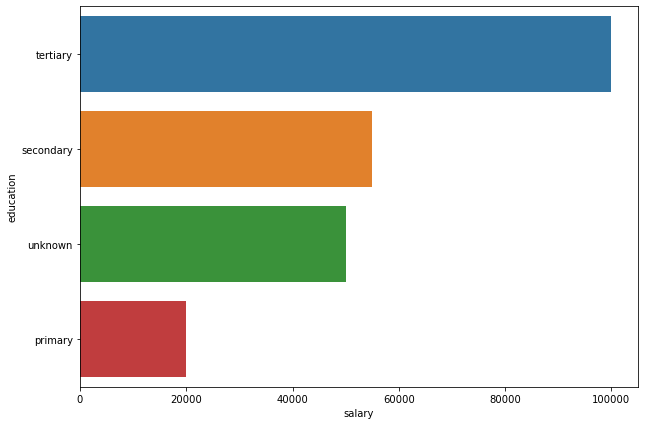

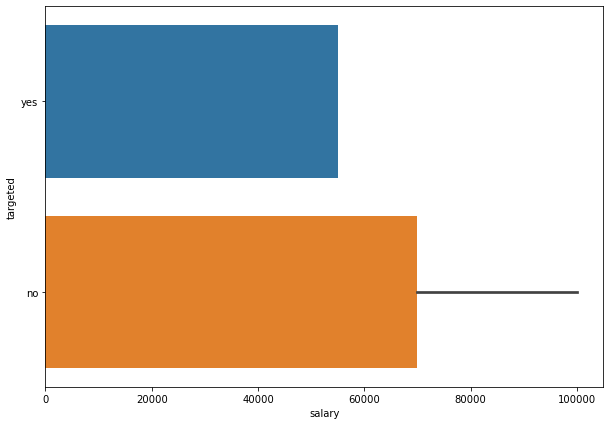

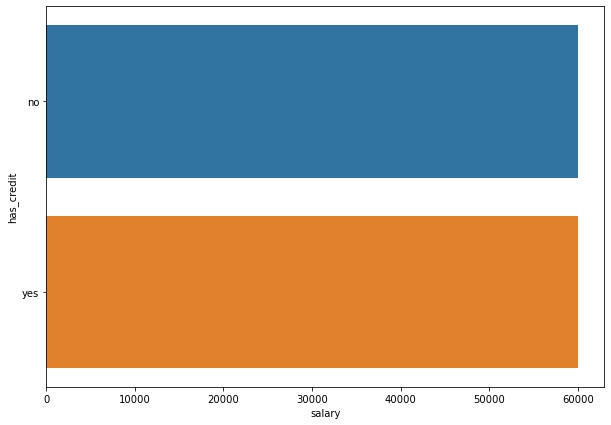

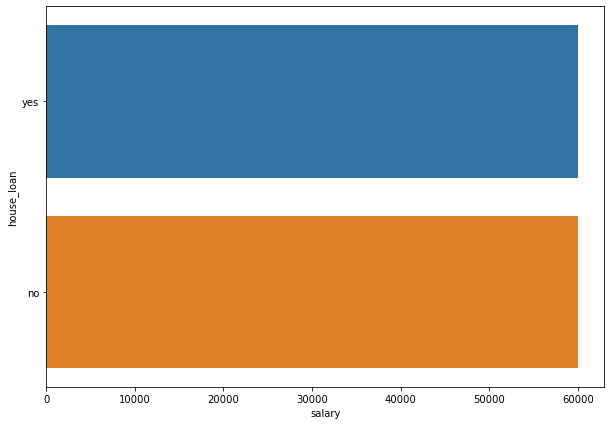

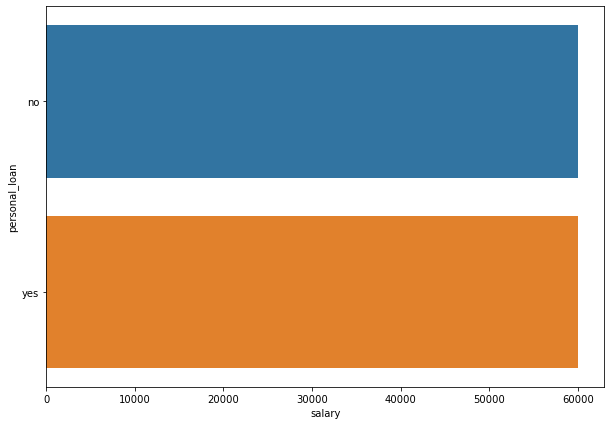

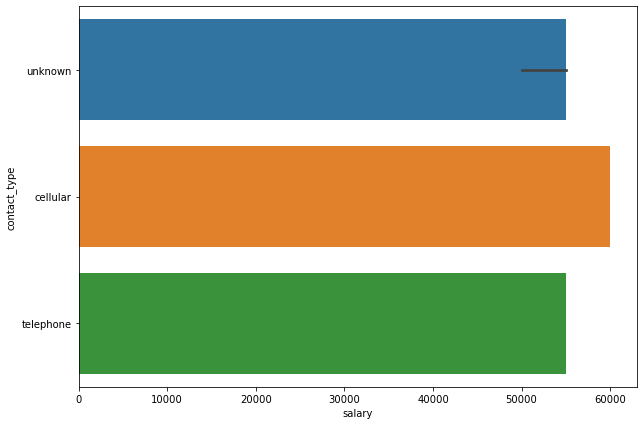

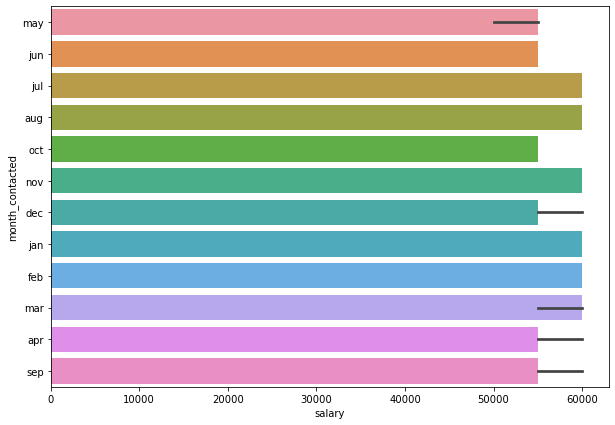

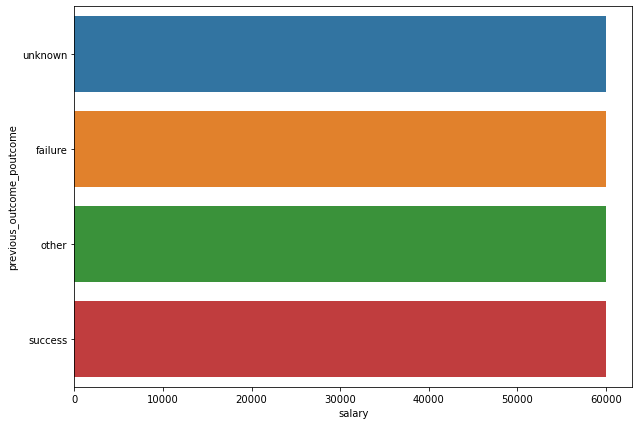

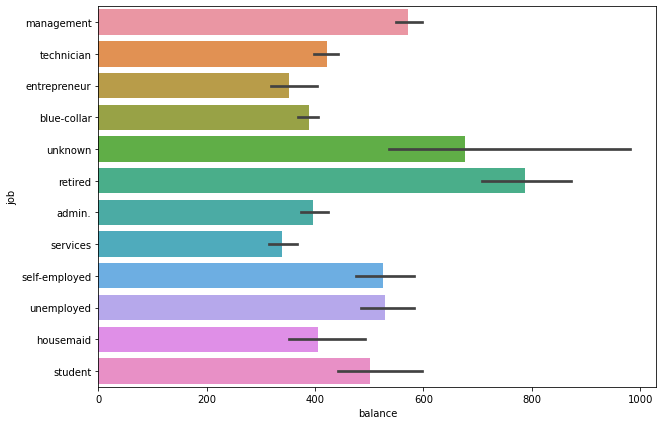

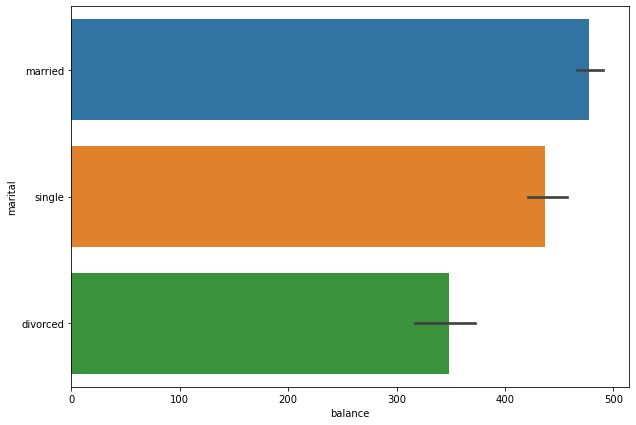

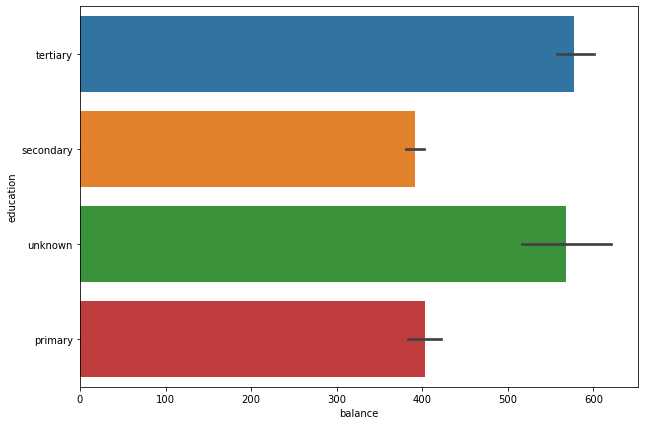

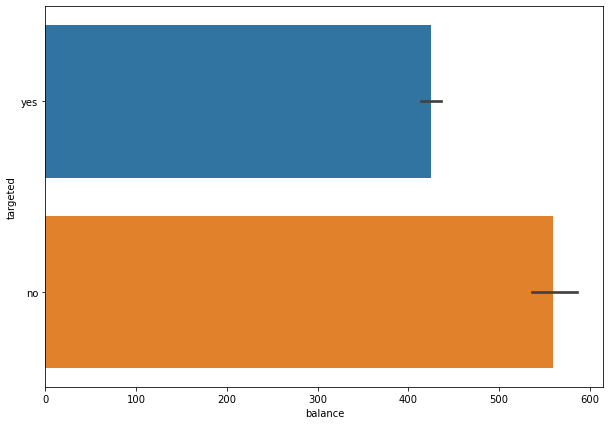

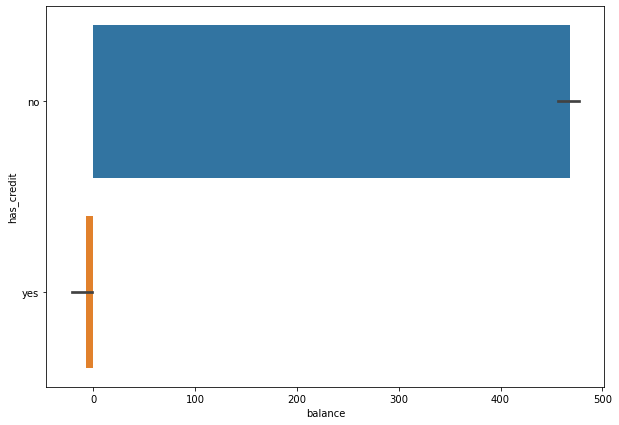

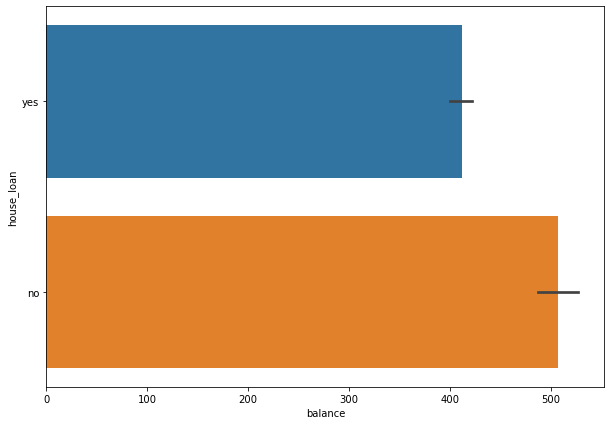

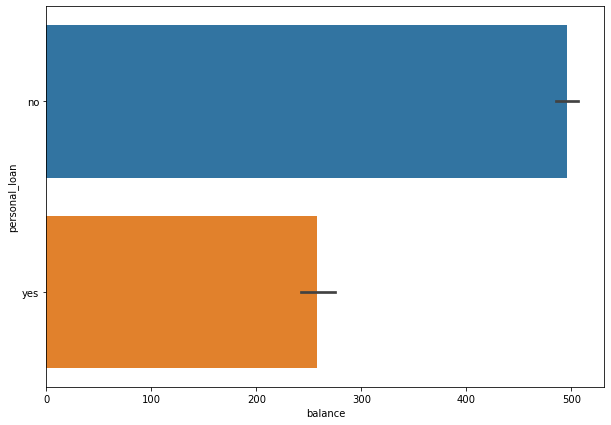

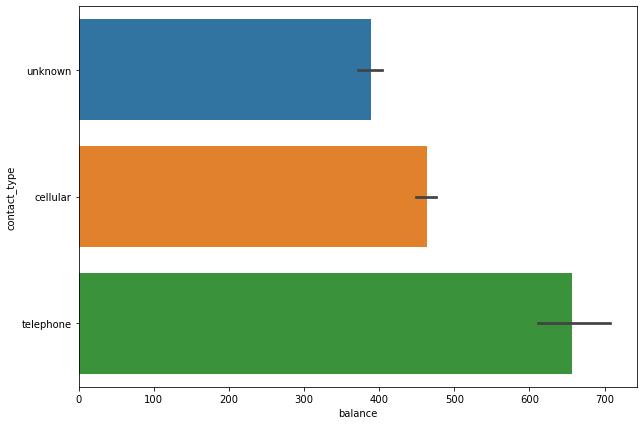

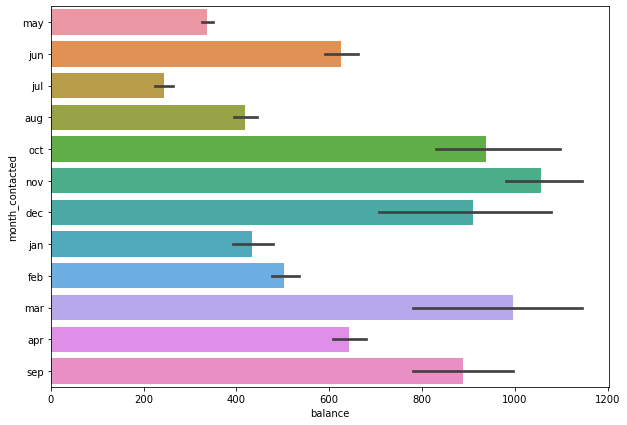

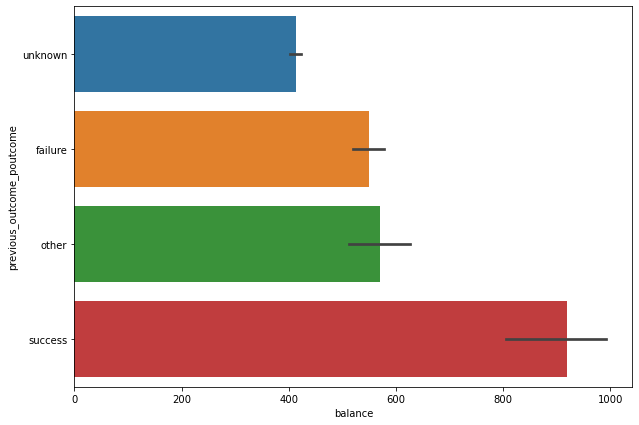

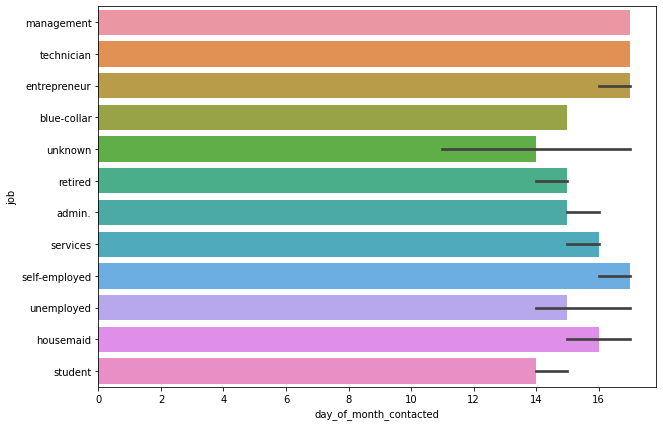

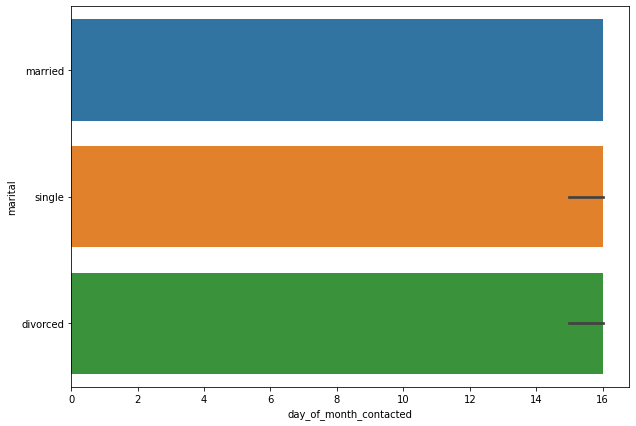

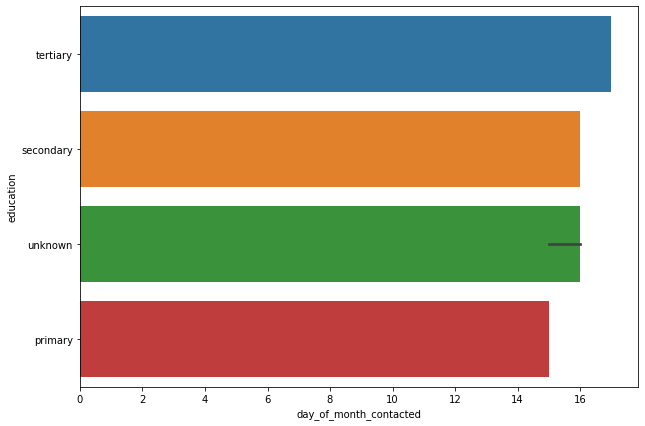

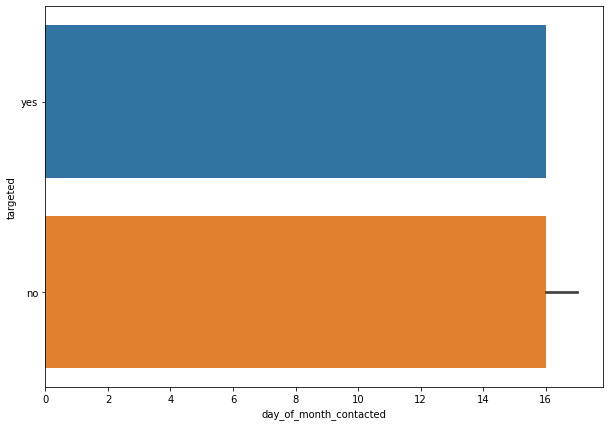

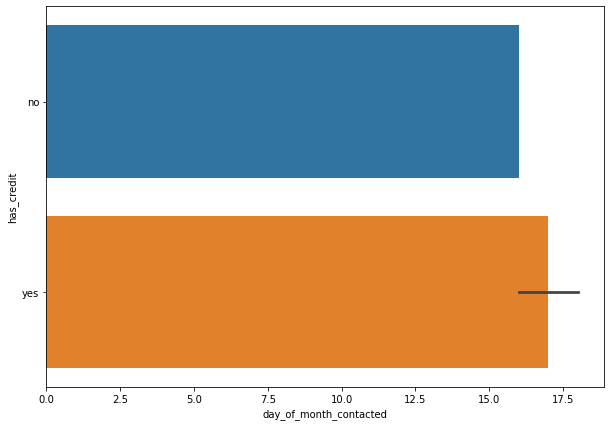

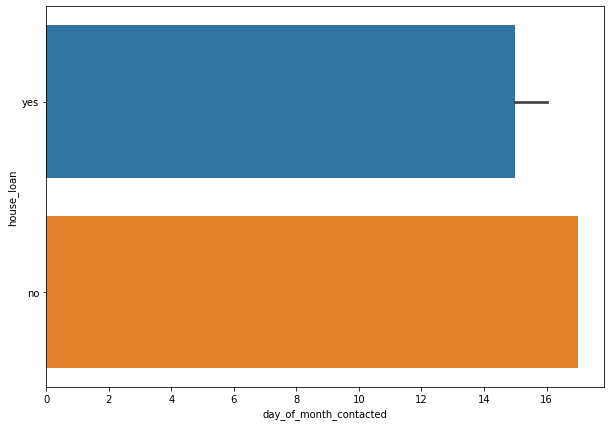

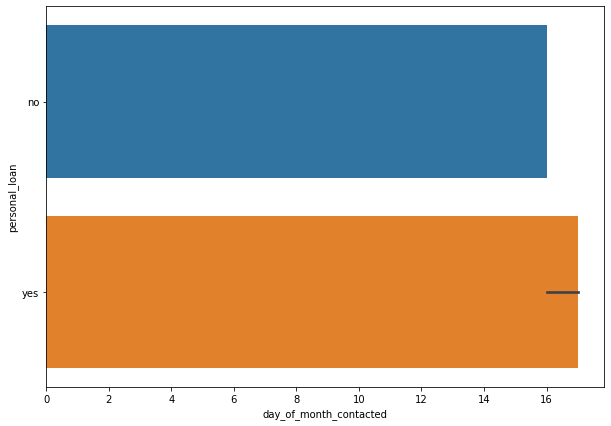

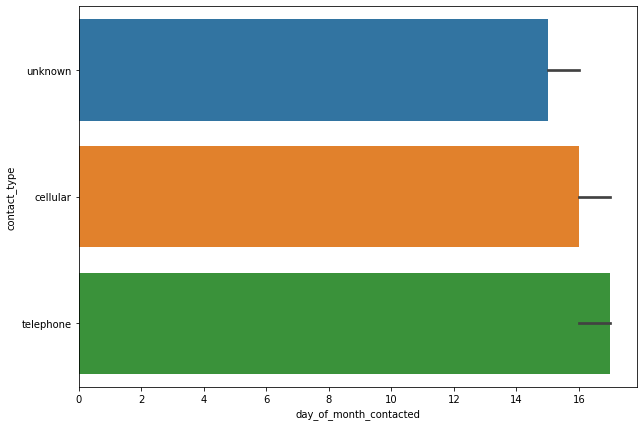

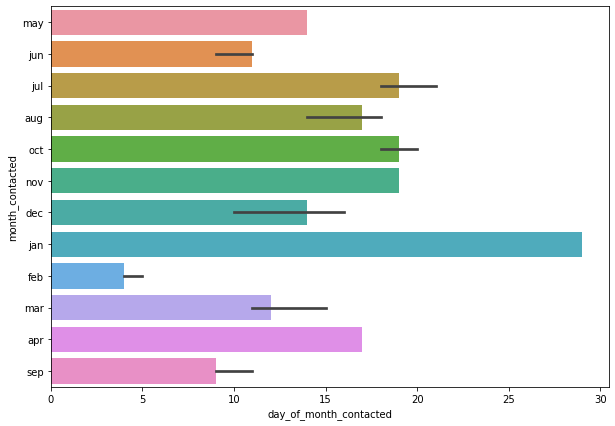

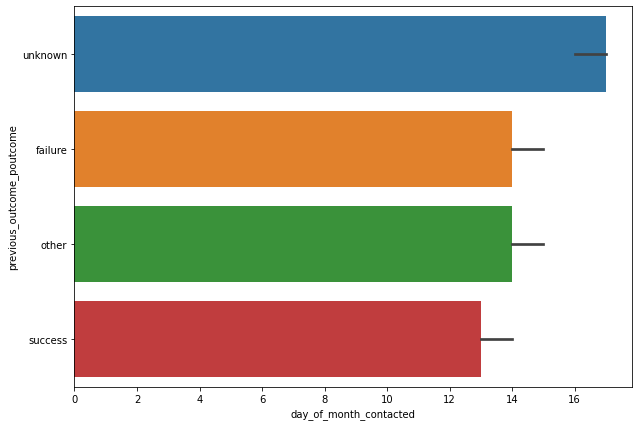

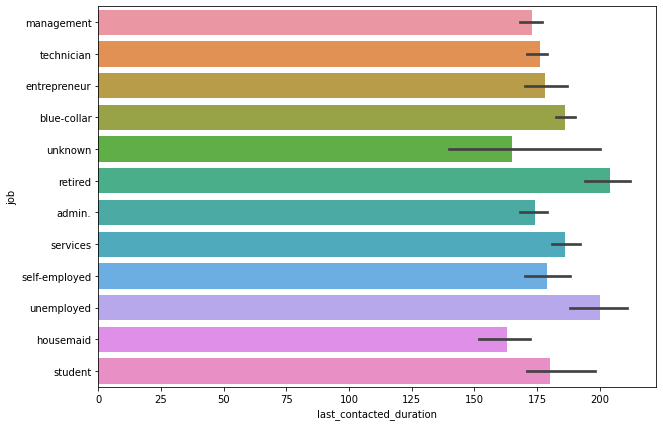

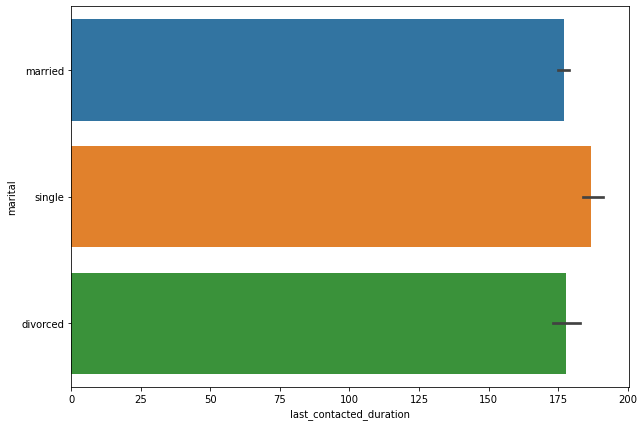

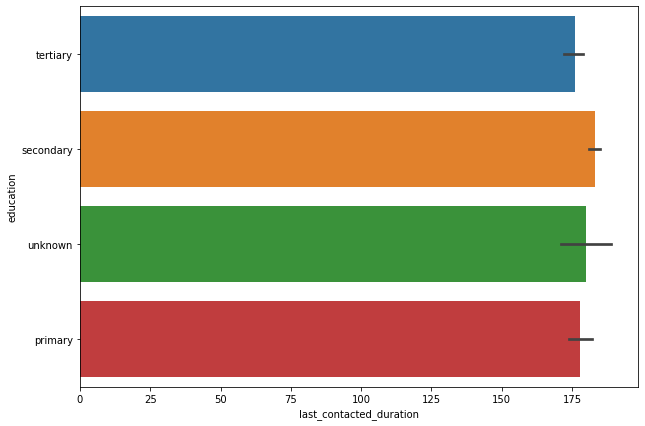

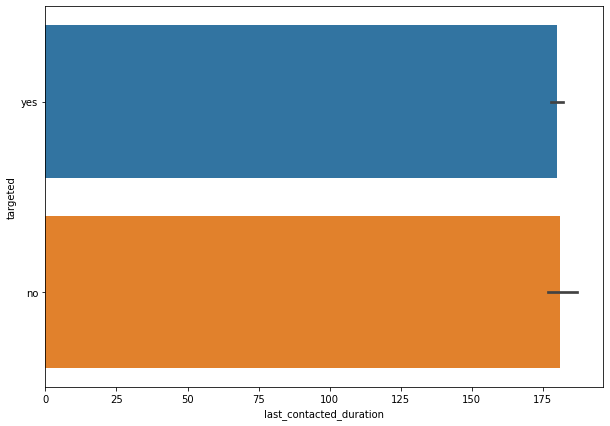

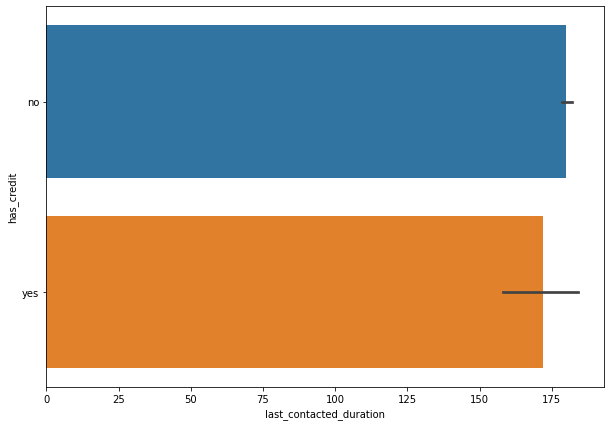

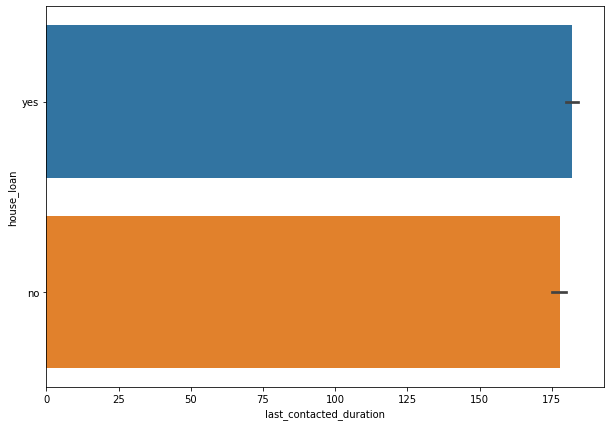

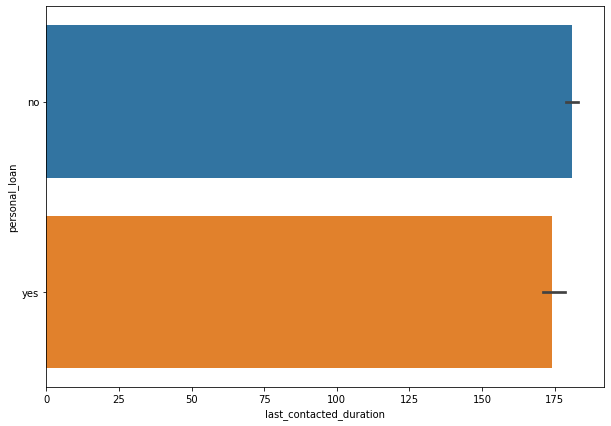

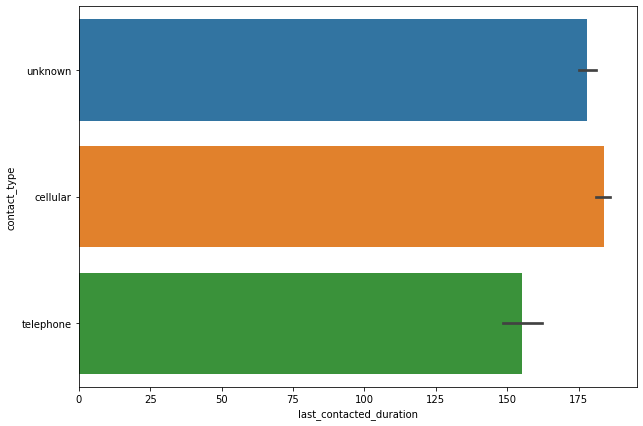

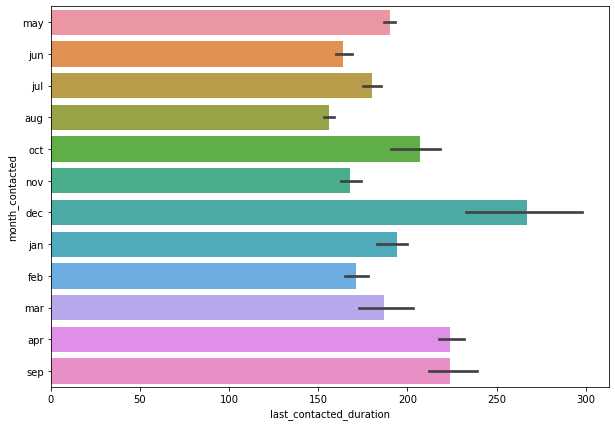

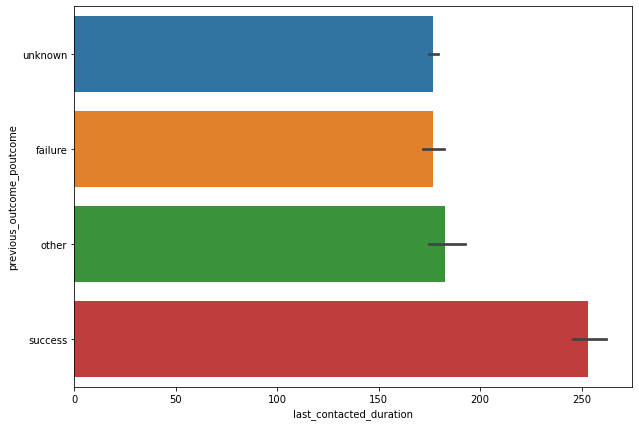

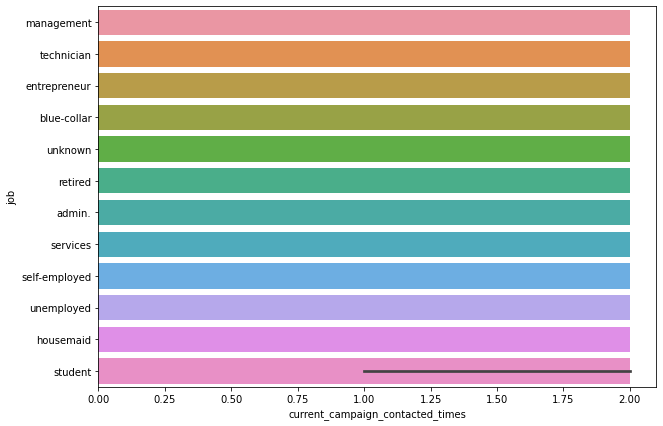

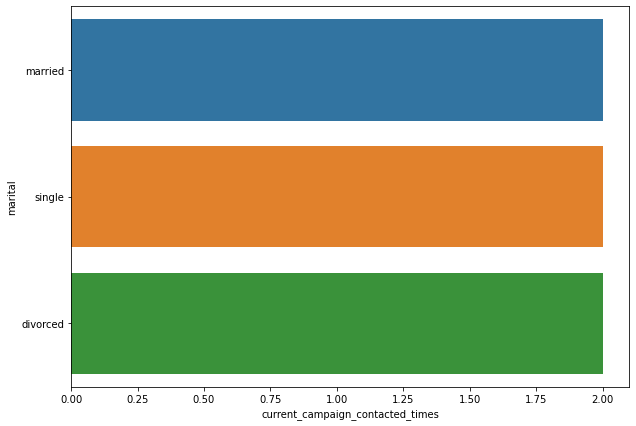

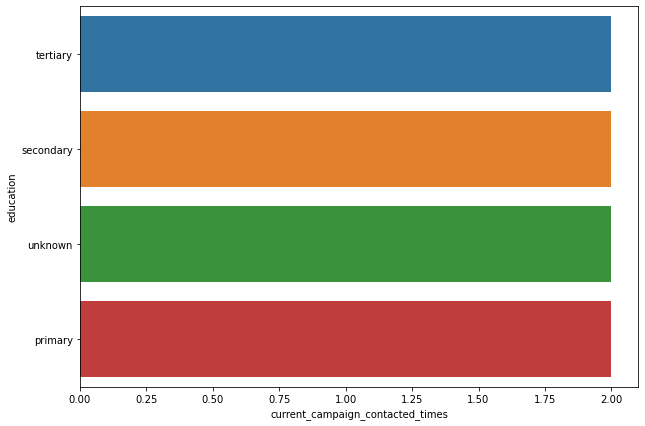

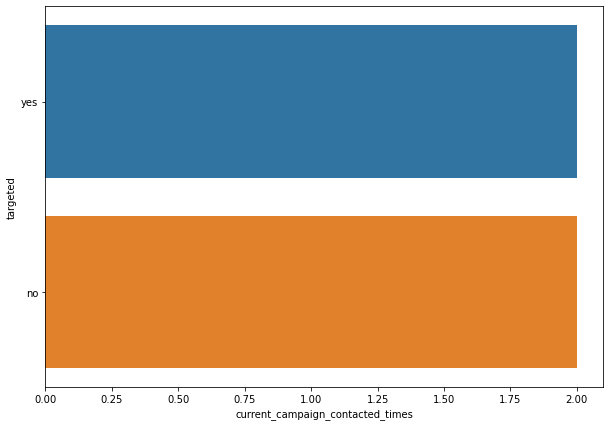

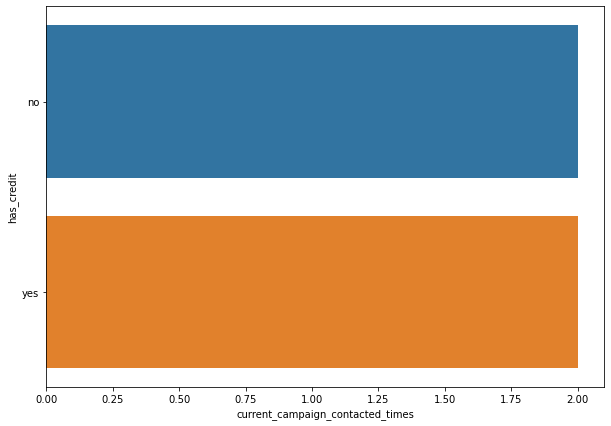

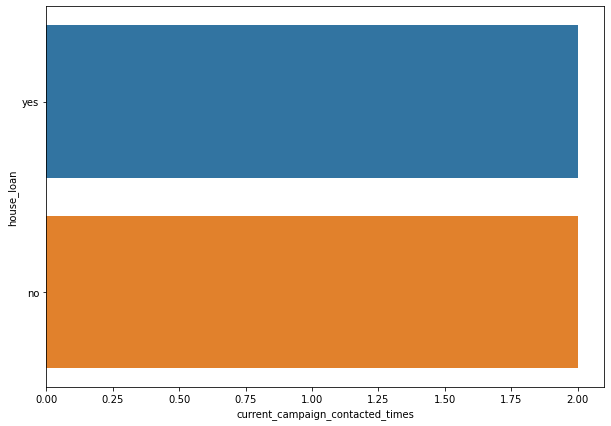

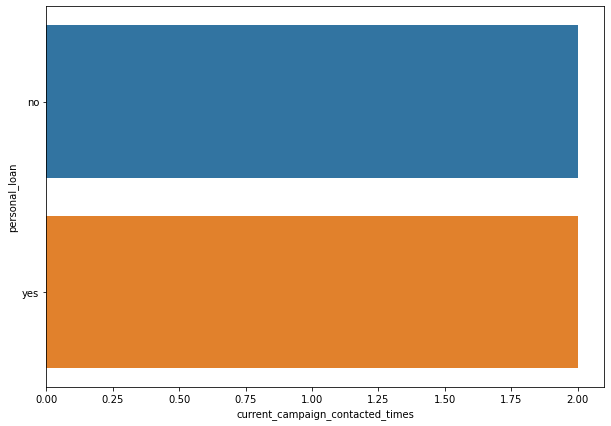

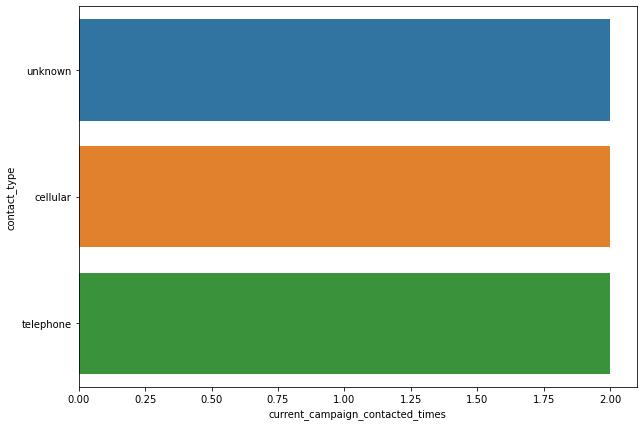

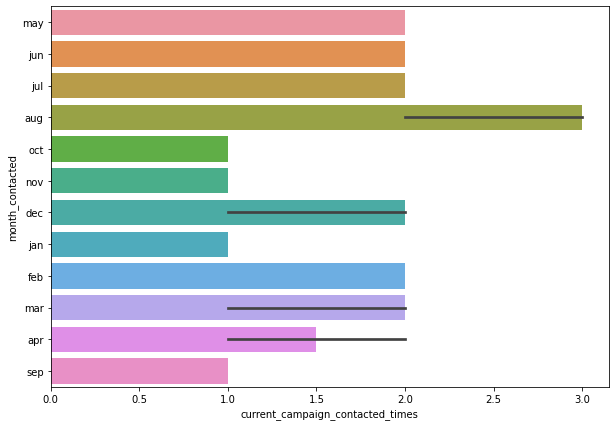

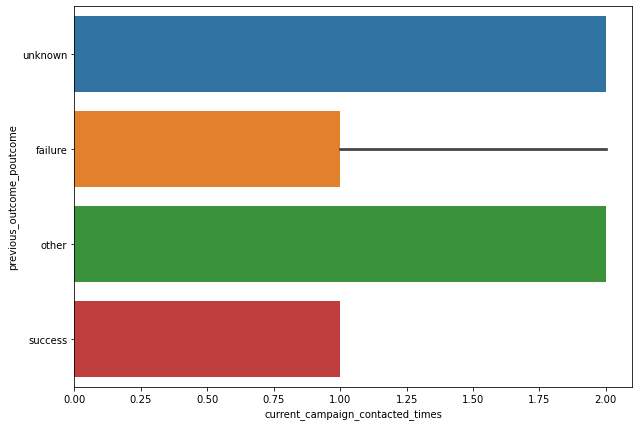

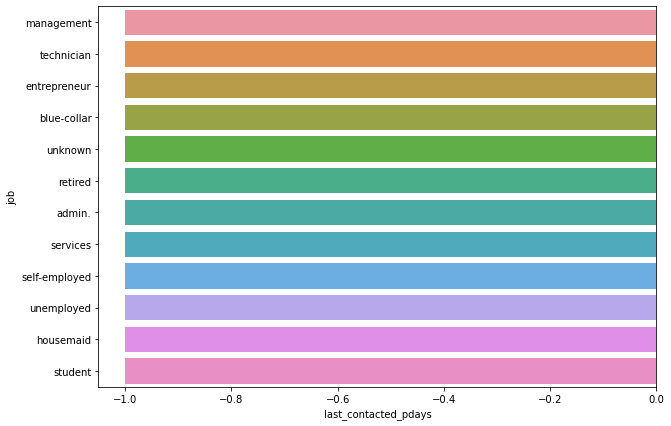

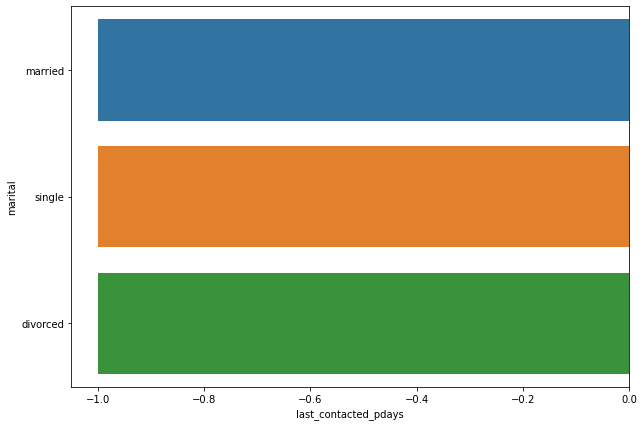

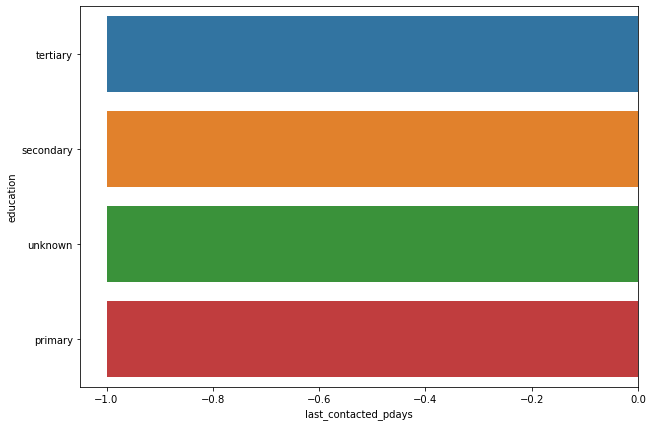

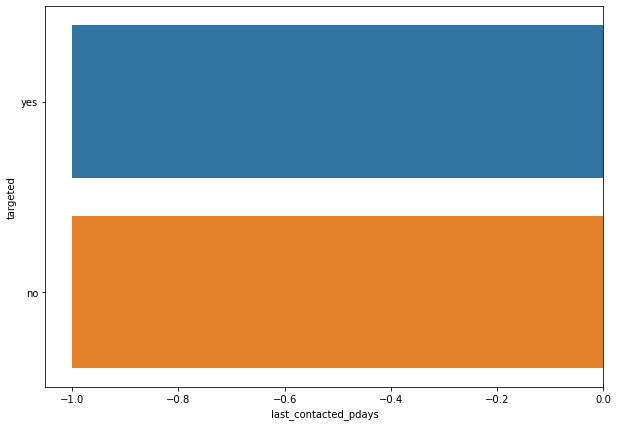

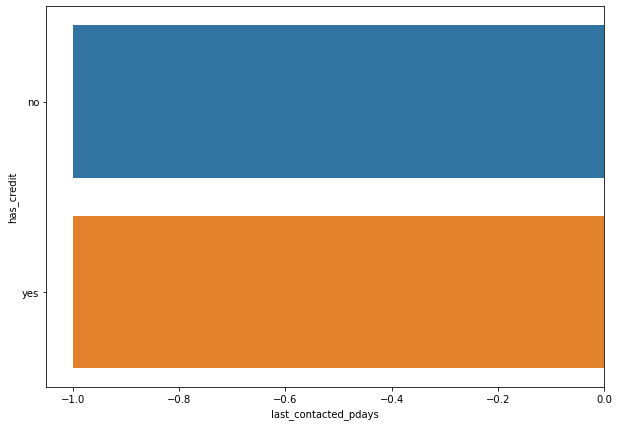

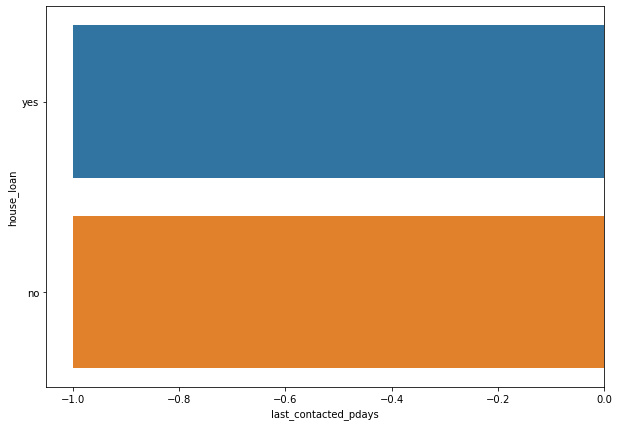

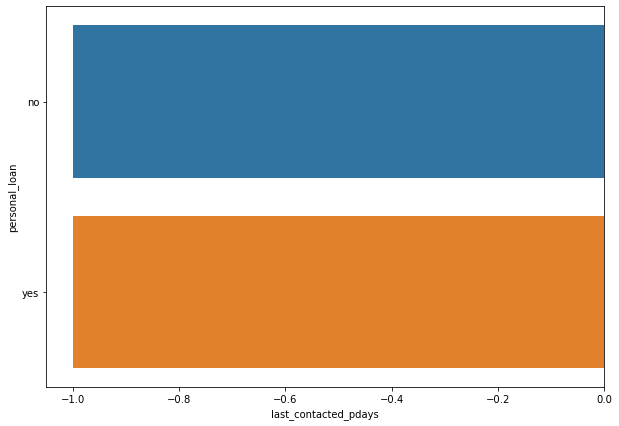

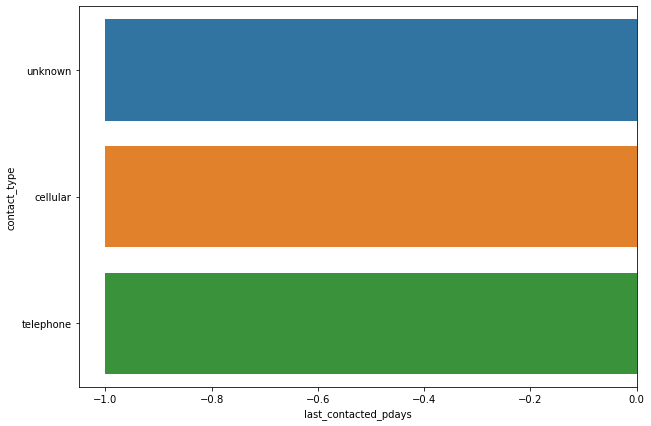

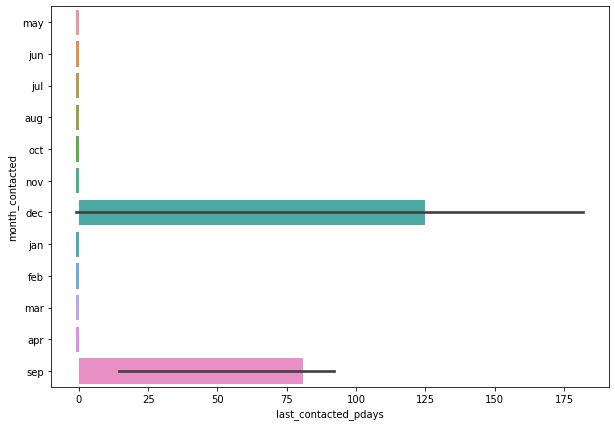

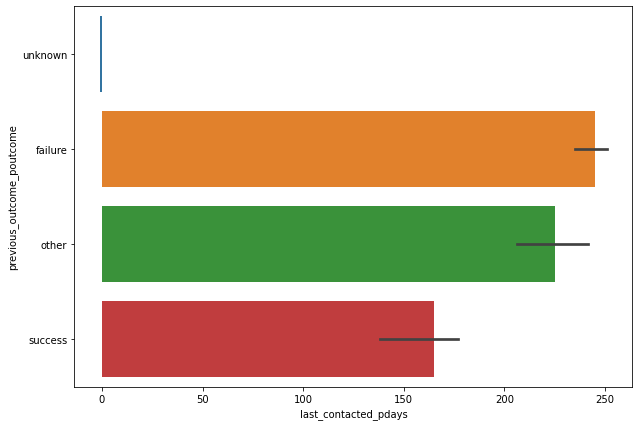

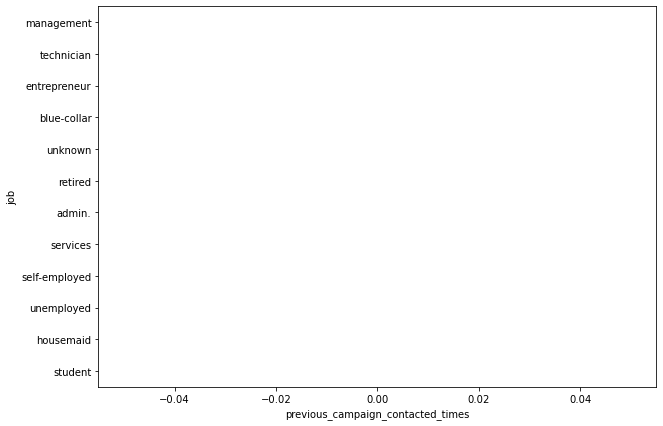

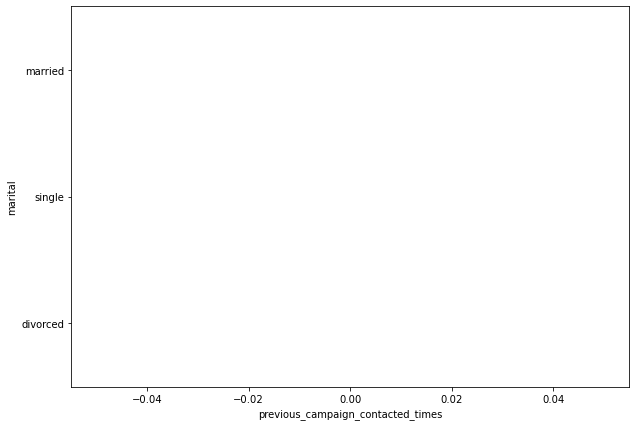

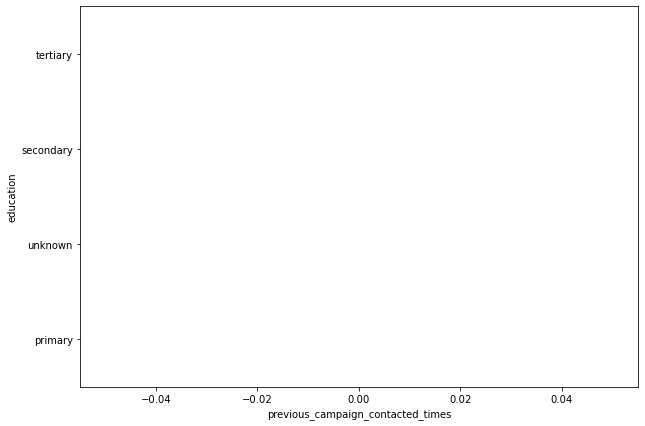

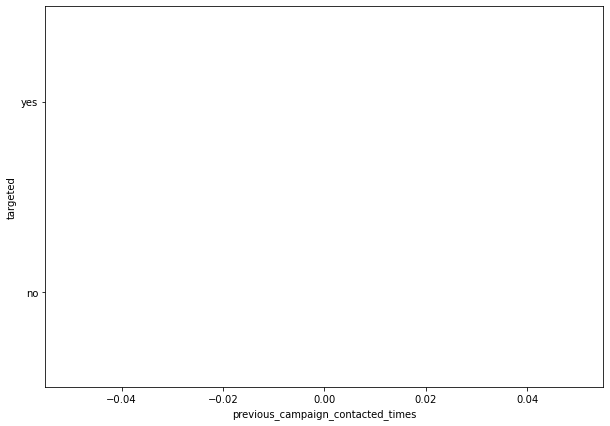

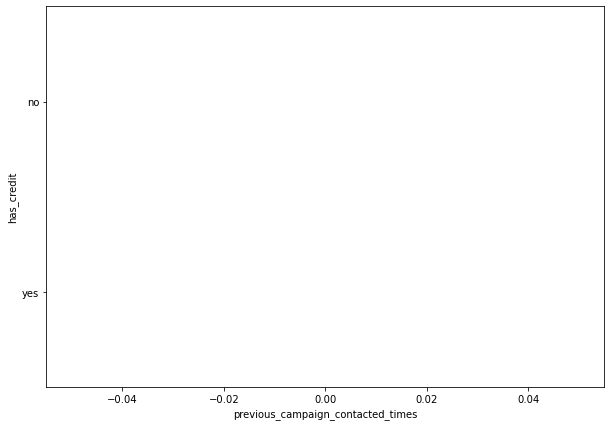

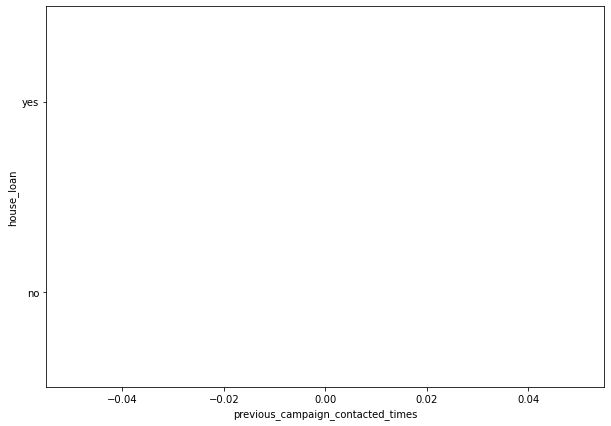

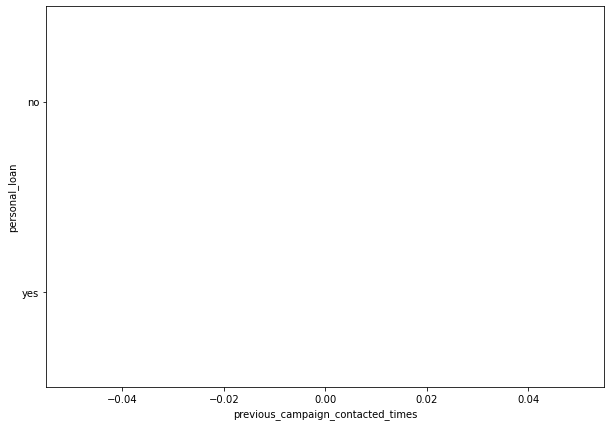

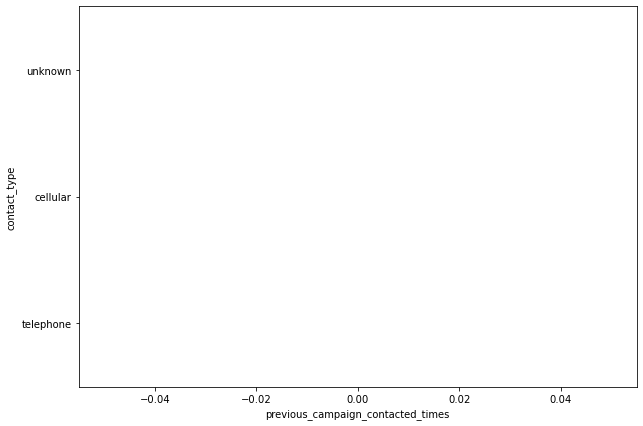

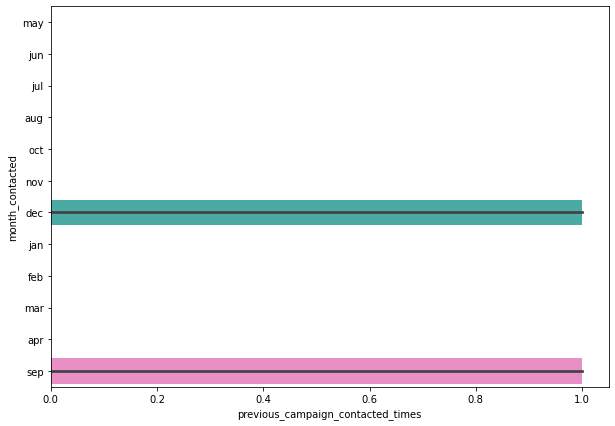

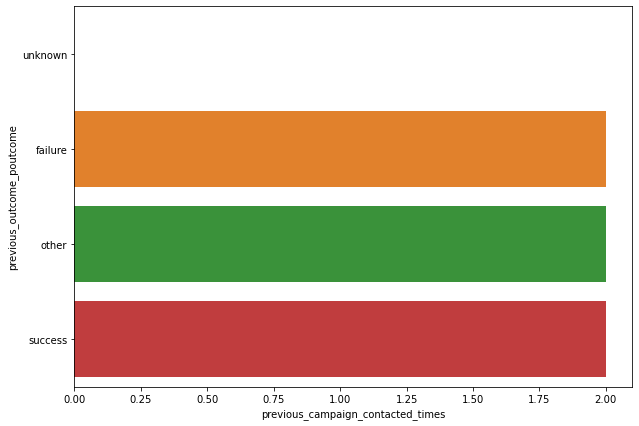

In [12]:
# Plotting each categorical columns with the numerical columns using the estimator as median

for n_col in num_cols:
    for c_col in cat_cols:
        plt.figure(figsize = (10,7))
        sns.barplot(x = n_col , y = c_col , data = df , estimator = median)
        plt.show()

Conclusion:- 
1. Based on age
- Median age of retired customers are 59
- Single customers has median age of 32
2. Based on Salary
- Salary of Entrepreneur are maximum i.e., median of 120000 and median salary of unknown customers are 0
- Median Salary of tertiary level education customers has maiximum salary of 100000
3. Based on Balance
- Maximum median balance are of retired customers with median balance of 787
- Customers who has credit are having balance of -7
- Customers who also accepted the last survey scheme has median balance of 920


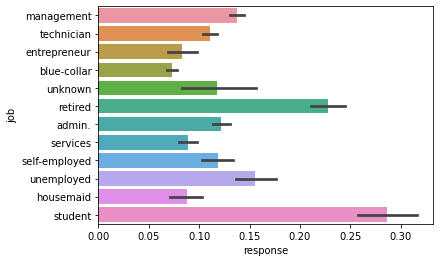

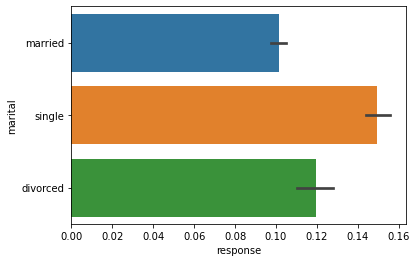

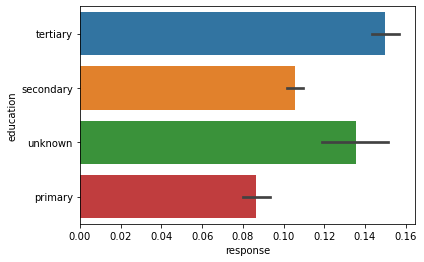

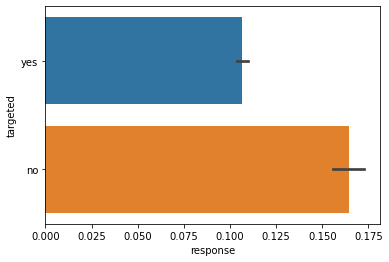

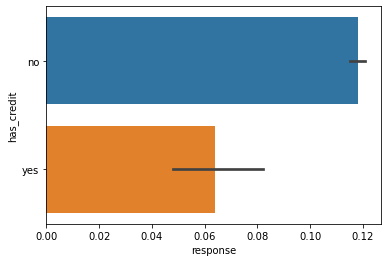

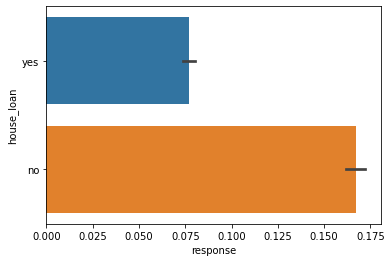

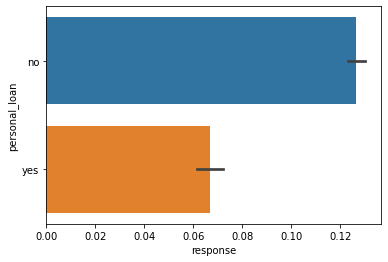

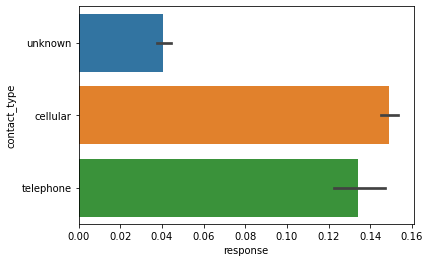

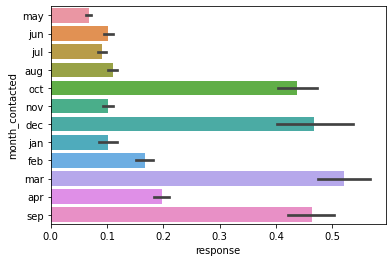

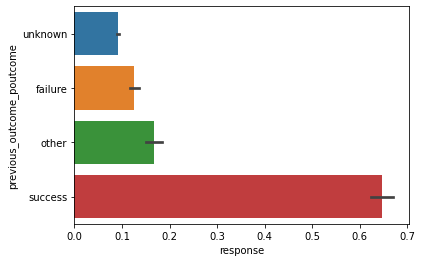

In [13]:
for col in cat_cols:
    sns.barplot(x = "response" , y = col , data = df)
    plt.show()

Conclusion:-
1. Based on job
- There is 28.6% chance that the students will response yes followed by the retired customers wit 22.7%
2. Based on Marital Status :
- Single Customers has 14.9% of chance to accept the term deposit
3. Education of tertiary level is has highest chance of 15%  to response yes
4. Customers with no credit  , no house_loan and no_personal has high chance to response yes
5. Customers who also accepted the last survey term has 65% chance that they will also accept the current term deposit

In [15]:
# Looking whether the features has the otliers in them

for col in num_cols:
    sns.boxplot(y = col , data = X)
    plt.show()

In [18]:
# HAndling the outliers

for i in range(X.shape[0]):
    for col in cat_cols:
        col = X.loc[i,col]
        
    for col in num_cols:
        col = X.loc[i,col]
        
    age = X.loc[i,"age"]
    balance = X.loc[i,"balance"]
    last_contacted_duration = X.loc[i,"last_contacted_duration"]
    current_campaign_contacted_times = X.loc[i,"current_campaign_contacted_times"]
    last_contacted_pdays = X.loc[i,"last_contacted_pdays"]
    previous_campaign_contacted_times = X.loc[i,"previous_campaign_contacted_times"]
    job = X.loc[i,"job"]
    contact_type = X.loc[i,"contact_type"]
    marital = X.loc[i,"marital"]
    education = X.loc[i,"education"]
    has_credit = X.loc[i,"has_credit"]
    personal_loan = X.loc[i,"personal_loan"]
    contact_type = X.loc[i,"contact_type"]
    previous_outcome_poutcome = X.loc[i,"previous_outcome_poutcome"]
    month_contacted = X.loc[i,"month_contacted"]
    
        
    if(age > 70):
        if(job == "retired"):
            new_age = np.random.randint(48,55)
        elif (contact_type == "telephonic"):
            new_age = np.random.randint(40,45)
        else:
            new_age = np.random.randint(30,60)
        X.loc[i,"age"] = new_age
    
    if(balance > 700):
        if(job == "unknown" or job == "retired"):
            new_balance = np.random.randint(640,750)
        elif (marital != "divorced"):
            new_balance = np.random.randint(350,450)
        elif (education != "secondary"):
            new_balance = np.random.randint(400,550)
        elif (has_credit == "yes"):
            new_balance = 0
        elif (personal_loan == "no"):
            new_balance = np.random.randint(250,490)
        elif (contact_type == "telephonic"):
            new_balance = np.random.randint(450,650)
        elif (previous_outcome_poutcome == "success"):
            new_balance = np.random.randint(490,900)
        else:
            new_balance = np.random.randint(0,700)
        X.loc[i,"balance"] = new_balance
            
            
         
        
        
    if(last_contacted_duration > 1100):
        
        if (month_contacted == "dec"):
            new_last_contacted_duration = np.random.randint(230,300)
        elif (previous_outcome_poutcome == "success"):
            new_last_contacted_duration = np.random.randint(180,250)
        else:
            new_last_contacted_duration = np.random.randint(100,800)
            
        X.loc[i,"last_contacted_duration"] = new_last_contacted_duration
         
        
        
    if(current_campaign_contacted_times > 7):
        
        if (month_contacted == "aug"):
            new_current_campaign_contacted_times = np.random.randint(2,3)
        elif (previous_outcome_poutcome != "success"):
            new_current_campaign_contacted_times = np.random.randint(1,2)
        else:
            new_current_campaign_contacted_times = np.random.randint(0,7)
        
        X.loc[i,"current_campaign_contacted_times"] = new_current_campaign_contacted_times
        
        
    if(last_contacted_pdays > 170):
        
        if (month_contacted == "sep" or month_contacted == "dec"):
            new_last_contacted_pdays = np.random.randint(80,125)
        elif (previous_outcome_poutcome == "unknown"):
            new_last_contacted_pdays = np.random.randint(-1,0)
        else:
            new_last_contacted_pdays = np.random.randint(-1,170)
       
        X.loc[i,"last_contacted_pdays"] = new_last_contacted_pdays
        
        
    if(previous_campaign_contacted_times > 10):
        X.loc[i,"previous_campaign_contacted_times"] = np.random.randint(0,10)

In [ ]:
# Cheking for the outlier after handling the outliers

for col in num_cols:
    sns.boxplot(y = col , data = X)
    plt.show()

In [19]:
# Performing Label Encoding to the categorical features

mappings = []

label_encoder = LabelEncoder()

label_df = X
for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(np.array(label_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))


In [20]:
# As the dataset is imbalance thus we are doing oversamling in order to get a good model

smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [21]:
# Splitting the train and test data

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,stratify = y_res,random_state=42)

In [22]:
# Using the Mixmaxscaler in order to scaler down every feature between 0 and 1

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Performing Kfold Cross Validation on Logistic Regression

pipe = Pipeline([('classifier', LogisticRegression())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

clf = GridSearchCV(pipe , param_grid = param_grid , cv = 5 , verbose = True , n_jobs = -1)

best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [24]:
# This is the best parameter to train the train dataset using Logistic Regression

best_clf.best_params_

{'classifier': LogisticRegression(C=0.615848211066026, solver='liblinear'),
 'classifier__C': 0.615848211066026,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [25]:
# Perfotming K-fold Cross validation on Random Forest

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [{'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf_forest = clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92217258 0.92614482 0.92785867 0.92782663 0.92832317 0.92848332
 0.92880366 0.92837121 0.92822709 0.92933223 0.92077903 0.92529591
 0.92572834 0.92641711 0.92625691 0.92765041 0.92733007 0.92801881
 0.92729805 0.92845128 0.9202025  0.92310153 0.92447902 0.92510372
 0.92534392 0.92620886 0.92569631 0.9252959  0.92556821 0.92646514
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


In [28]:
# Best parameter for Random Forest Classifier

best_clf_forest.best_params_

{'classifier': RandomForestClassifier(max_features=6),
 'classifier__max_features': 6,
 'classifier__n_estimators': 100}

In [29]:
# Training the dataset with the best parametes of Logistic Regression

best_params = [{'classifier': LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear'),
 'classifier__C': 0.615848211066026,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}]
log_model = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear',)
log_model.fit(X_train,y_train)
log_model.score(X_test,y_test)

0.8508552758024217

In [30]:
# Looking to the precision Recall and F1 score of the Logistic Regression model

y_true = y_test
y_pred = log_model.predict(X_test)                      
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.84      0.85      7805
     class 1       0.84      0.87      0.85      7804

    accuracy                           0.85     15609
   macro avg       0.85      0.85      0.85     15609
weighted avg       0.85      0.85      0.85     15609



In [31]:
# Training the dataset using the best parameters of the Random Forest Classifier

best_clf_forest_best_params = {'classifier': RandomForestClassifier(max_features=6, n_estimators=90),
 'classifier__max_features': 6,
 'classifier__n_estimators': 90}
forest_model = RandomForestClassifier(max_features=6, n_estimators=90)
forest_model.fit(X_train,y_train)
forest_model.score(X_test,y_test)

0.9322185918380421

In [32]:
# Looking to the precision Recall and F1 score of the Random Forest Classifier


y_true = y_test
y_pred = forest_model.predict(X_test)                      
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.91      0.93      7805
     class 1       0.92      0.95      0.93      7804

    accuracy                           0.93     15609
   macro avg       0.93      0.93      0.93     15609
weighted avg       0.93      0.93      0.93     15609



0.9212846875286282 0.9826822904267953


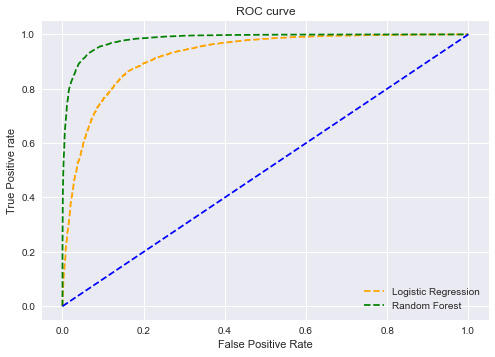

In [34]:
# Making ROC AUC Curve for both the model
# predict probabilities
prob_log = log_model.predict_proba(X_test)
pred_forest = forest_model.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, prob_log[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_forest[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, prob_log[:,1])
auc_score2 = roc_auc_score(y_test, pred_forest[:,1])

print(auc_score1, auc_score2)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

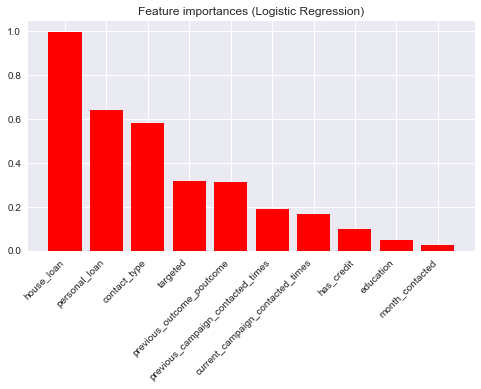

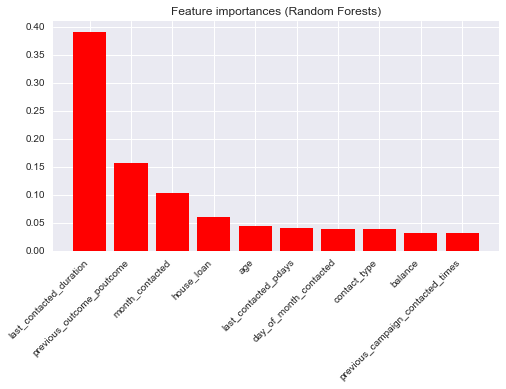

In [35]:
# Important features according to both the model

# clf = LogisticRegressionCV(max_iter=3000)
log_model.fit(X, y)
coefs = np.abs(log_model.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

forest_model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=50, max_leaf_nodes=150) #has already been tuned
forest_model.fit(X, y)
coefs = forest_model.feature_importances_
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Random Forests)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.ion(); plt.show()

#### Final Conclusion

1. Random Forest performs better on the test data with accuracy of 93% while Logistic regression gives accuracy of 85%
2. The auc score of random forest is 98.2% while the auc score of logistic regression is 92.1%
3. Precision and recall value of Random forest is much better than the Logistic regression
4. The common top features in both the model is 
- house_loan 
- contact_type
- previous_outcome_poutcome
- previous_campaign_contacted_times
- month_contacted
- last_contacted_duration